# 🛳️ Titanic Disaster Survival Analysis

## 0. Problem Statement & Analytical Questions

### ❓ Problem
> **Who survived and who did not survive the Titanic disaster?**  
> **Who would have had a higher chance of surviving the Titanic disaster?**

### 🧠 Domain Knowledge
On **April 15, 1912**, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing **1502 out of 2224 passengers and crew**. This translates to a **32% survival rate**.

One of the major reasons for this tragic loss of life was the **insufficient number of lifeboats** for passengers and crew.

While there was certainly an element of **luck** involved in survival, factors like:
- **Gender** (Women)
- **Age** (Children)
- **Socio-economic class** (Upper-class passengers)

...played a significant role in determining who was more likely to survive.




In [34]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data Overview

### 🗂️ Titanic Dataset - Data Dictionary

This dataset contains the following key variables:

| **Variable** | **Definition** | **Values / Key** |
|--------------|----------------|-----------------|
| **survival** | Survival outcome | `0 = No` (Did not survive), `1 = Yes` (Survived) |
| **pclass** | Passenger ticket class (proxy for socio-economic status) | `1 = 1st` (Upper class), `2 = 2nd` (Middle class), `3 = 3rd` (Lower class) |
| **sex** | Gender of the passenger | `male`, `female` |
| **age** | Age of the passenger (in years) | Continuous numerical value |
| **sibsp** | Number of siblings or spouses aboard the Titanic | Integer count |
| **parch** | Number of parents or children aboard the Titanic | Integer count |
| **ticket** | Ticket number assigned to the passenger | Alphanumeric |
| **fare** | Amount paid for the ticket (Passenger fare) | Continuous numerical value |
| **cabin** | Cabin number where the passenger stayed | Alphanumeric (may have missing values) |
| **embarked** | Port of embarkation (where the passenger boarded the Titanic) | `C = Cherbourg`, `Q = Queenstown`, `S = Southampton` |

In [35]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

❓ Which features are available in the dataset?

In [36]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


❓ **Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

❓ **Which features are numerical?**

These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

**Continous**: Age, Fare. 

**Discrete**: SibSp, Parch.

❓ Data Overview

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Feature**

❓ **Which features are mixed data types?**

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.
Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

❓ **Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.
Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [38]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


❓ **Which features contain blank, null or empty values?**

These will require correcting.

Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
Cabin > Age are incomplete in case of test dataset.

❓ **What are the data types for various features?**

- Helping us during converting goal.
- 7 features are integer or floats.
- 5 features are strings (object).

In [39]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

❓ **What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).\
- Survived is a categorical feature with 0 or 1 values.\
- Around 38% samples survived representative of the actual survival rate at 32%.\
- Most passengers (> 75%) did not travel with parents or children.\
- Nearly 30% of the passengers had siblings and/or spouse aboard.\
- Fares varied significantly with few passengers (<1%) paying as high as $512.\
- Few elderly passengers (<1%) within age range 65-80.

In [40]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


❓ What is the distribution of categorical features?

- Names are unique across the dataset (count=unique=891)\
-  Sex variable as two possible values with 65% male (top=male, freq=577/count=891).\
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.\
- Embarked takes three possible values. S port used by most passengers (top=S)\
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [41]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 2. EDA by Visualization

**Now we can continue confirming some of our assumptions using visualizations for analyzing the data.**

❓ **Correlating numerical features**

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.


**Observations**
- Infants (Age <=4) had high survival rate.\
- Oldest passengers (Age = 80) survived.\
- Large number of 15-25 year olds did not survive.\
- Most passengers are in 15-35 age range.

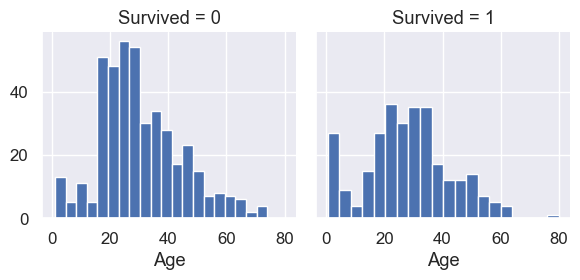

In [42]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

❓ **Correlating numerical and ordinal features**

**Observations**
- Pclass=3 had most passengers, however most did not survive. 
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. 
- Most passengers in Pclass=1 survived. 

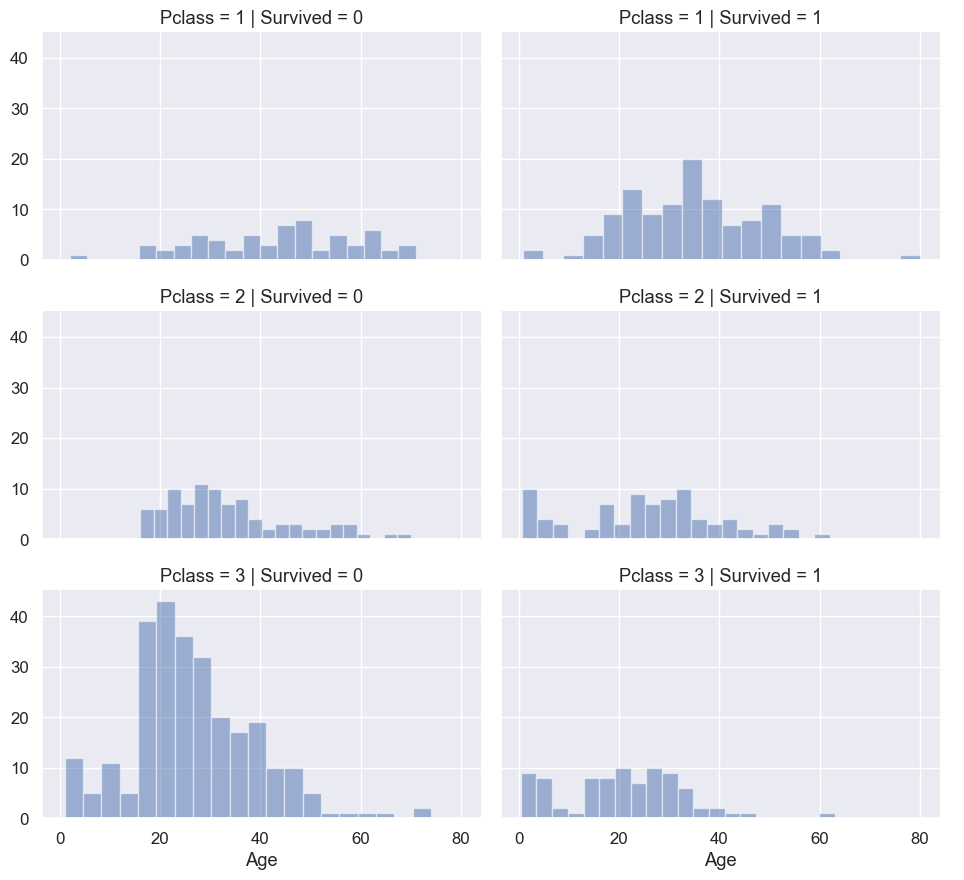

In [43]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

❓ **Correlating categorical and numerical features**

- Fare and Pclass are strongly correlated with survival.
- Embarked reflects disparities in economic conditions & survival chances.
- Females generally have higher survival rates, especially in rich ports (S, C).

/opt/anaconda3/envs/fsds_env/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/anaconda3/envs/fsds_env/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/envs/fsds_env/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/envs/fsds_env/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/envs/fsds_env/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for th

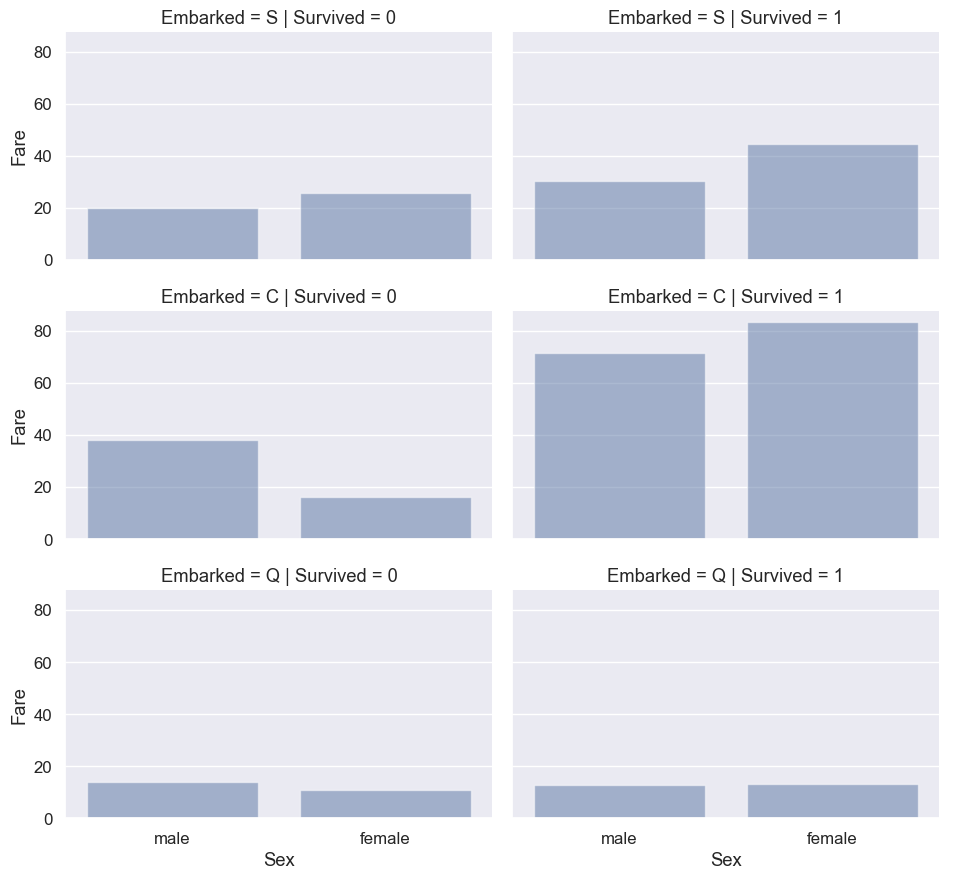

In [44]:

# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

❓ **Analyze the relationship between variables**

In [ ]:
# train_df.corr()
df_numeric = train_df.select_dtypes(include=['number'])  # chỉ lấy các cột số
df_numeric.corr()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


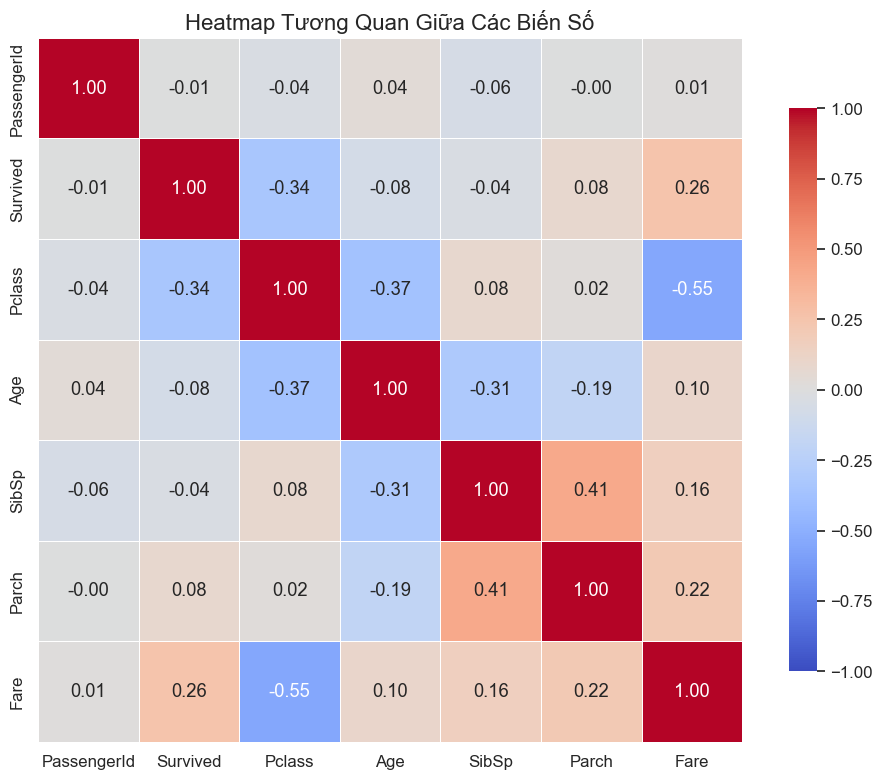

In [46]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.1)  

# Vẽ heatmap
sns.heatmap(
    df_numeric.corr(),
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",     
    vmin=-1, vmax=1,     
    linewidths=0.5,       
    linecolor='white',
    square=True,          
    cbar_kws={"shrink": 0.8}
)

plt.title("Heatmap Tương Quan Giữa Các Biến Số", fontsize=16)
plt.tight_layout()
plt.show()

### 🔍 Correlation Matrix Interpretation

 Col 1. PassengerId
- Correlation values close to **0** with all other variables → No meaningful relationship.
- This is expected because **PassengerId is just an identifier**, unrelated to survival chances.

 Col 2. Survived (Target Variable)
- **Survived vs Pclass: -0.338** → **Moderate negative correlation**: Lower-class passengers (higher Pclass values) were less likely to survive.
- **Survived vs Fare: 0.257** → **Weak positive correlation**: Higher fare-paying passengers had a higher chance of survival.
- **Survived vs Age: -0.077** → Very weak negative correlation: Younger passengers slightly more likely to survive.
- **Survived vs SibSp/Parch** → Very weak correlations (0.08, -0.03): Little direct impact from number of family members aboard.

- **Pclass** and **Fare** are the most influential features related to survival.

 Col 3. Pclass
- **Pclass vs Fare: -0.549** → Strong negative correlation: Lower-class passengers paid lower fares.
- **Pclass vs Age: -0.369** → Lower-class passengers tended to be younger.

 Col 4. Age
- **Age vs SibSp: -0.308** → Older passengers less likely to travel with siblings/spouses.
- **Age vs Parch: -0.189** → Older passengers less likely to travel with parents/children.

 Col 5. SibSp vs Parch
- Correlation of **0.415** → Passengers traveling with siblings/spouses also often traveled with parents/children.

 Col 6. Fare
- Weak positive correlations with:
  - **SibSp (0.16)**
  - **Parch (0.21)**
- Possibly indicates families with more members booked higher-priced tickets (cabins).



## 3. Data Cleaning & Feature Engineering

a. Extract Title from Name - Create new feature

In [51]:
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


b. Replace value

In [52]:
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

In [53]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


## 4. Key Findings

🗝️ Key Insights from Titanic EDA

1. Gender plays a critical role in survival chances
 - Females had significantly higher survival rates than males.
 - This aligns with the historical “women and children first” evacuation priority.

2. Passenger Class (Pclass) strongly affects survival
 - 1st class passengers had the highest survival rates.
 - 3rd class passengers had the lowest survival rates.
 - Correlation: Survived vs Pclass = -0.338 (moderate negative correlation).

3. Fare positively correlates with survival
 - Higher paying passengers were more likely to survive.
 - Correlation: Survived vs Fare = 0.257 (weak positive correlation).

4. Age has a weak but notable impact
 - Infants (<= 4 years old) had high survival rates.
 - Elderly passengers had lower survival rates, but with some exceptions.
 - Correlation: Survived vs Age = -0.077 (weak negative correlation).

5. Embarkation port shows socio-economic disparities
 - Most passengers embarked from Southampton (S).
 - Passengers from Cherbourg (C) had higher survival rates.
 - Reflects economic conditions influencing survival chances.

6. Dataset representativeness
 - Dataset covers ~40% of actual Titanic passengers (891 out of 2224).
 - Survival rate in dataset: 38%, close to historical 32% → good representativeness.
